# **La Classification avec un réseau de neurones**

## **Qu'est-ce qu'un probleme de clasification ?**

Vous avez certainement été en contact avec un probleme de ***classification*** un jour ou l'autre, ue ce soit dans votre vie professionelle ou personelle.

En effet, vous avez certainement été contraint un jour ou l'autre à vérifier si le dernier mail reçu était un **Spam** ou **Non**.

Que l'on vous accorde le prêt d'un **crédit** ou qu'on vous le **refuse**.

De vous demander quels **Tag** aura l'article suivant, sivant une liste de **Tag** défini.

Ou de tester une application qui reconnait le ou les objets présents sur une **photo** prise avec votre nouveau smartphone. Vous permettant ainsi une recherche facile des images.

Tout ces exemples sont des problèmes de ***Classification*** de la vie courante!





> ### **Type de Classification**

Vous avez donc des classifications :
1. **Binaire** - Pouvant classer l'objet de la recherche dans une classe ou l'autre.
  - Un échantillon aura un seul label parmis deux labels différent.
2. **MultiClasse** - Pouvant classer l'objet de la recherche dans une de nombreuses classes (>2 classes)
  - Un échantillon aura un seul label parmis plusieurs labels possibles.
3. **Multilabel** - Pouvant classer l'objet de la recherche dans plusieurs classes en même temps, parmis un plusieurs labels possibles.

## **Ce que nous allons voir dans ce cours**

1. L'architecture d'un réseau de neurone de classification.
2. Les entrées et sorties d'un réseau de neurones de classifications.
3. Voir les données et les entrainer.
4. Les différentes étapes de la création d'un réseau de neurones
  - Créer le modèle
  - compiler le modèle
  - Entrainer le modèle
  - Evaluer le modèle
5. Evaluer différents types de classifications
6. Sauver et charger son modèle.

## **La classifications : Les entrées et sorties**

Quelle que soient les données à classifier, il faudra les rendre numériques si ce n'est pas le cas.
Mais par la suite, 

## **Les fonctions d'activations**

Nous avons vu l'activation `Relu` est la fonction d'activation du/des neurone(s) de sortie qui est utilisée en régression.

En classification il y a d'autres fonctions, qui ne seront pas expliquées ici, qui interviennent :
1. **Classification Binaire** : la fonction Sigmoïd.
 > -  Fonction Loss : `BinaryCrossEnthrop`
 > -  Optimizer : `Adam` ou `SGD`
2. **Classification Multiclass** : la fonction Softmax 
 > -  Fonction Loss : `CategoricalCrossEnthrop`
 > -  Optimizer : `Adam` ou `SGD`



# **Allons voir ce qui se passe dans le code**







> ## **Classification Binaire**

>> ### **Créons les data**

Pour cet exemple, prenons quelque chose de très visuel.

Nous allons créer deux cercles proches l'un de l'autre.
Le but sera de déterminer la frontière de classification entre les deux cercles!

In [1]:
from sklearn.datasets import make_circles
import tensorflow as tf

In [2]:
#Prenons 1000 exemples pour avoir une dataset large et une frontière la plus visible
samples = 1000
X, y = make_circles(n_samples = samples, noise = 0.03, random_state = 42)

**Souvenez-vous**, dans un problème, il faut 
- visualiser, 
- visualiser, 
- visualiser!

In [ ]:
#X,y

In [3]:

import pandas as pd

circles = pd.DataFrame(
    {"X0":X[:,0],
     "X1":X[:,1],
     "y":y})

circles.head()

,X0,X1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


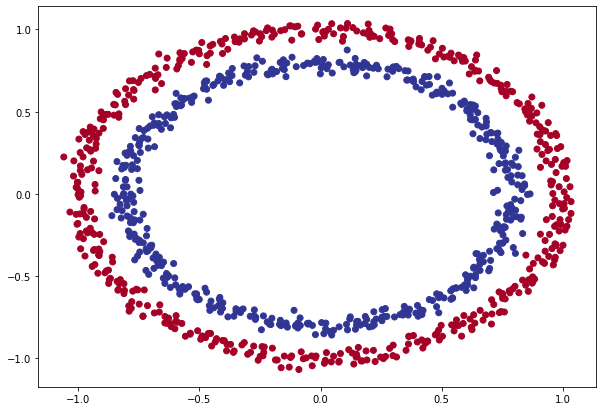

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap = plt.cm.RdYlBu) 
# Nous dessinons X[0] en fonction de X[1], où la couleur est y (soit 1 ou 0)


In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(X), len(y)

(1000, 1000)

>> ### **Quelles sont les étapes de modélisation avec un RNN**

- 1. Créer le modèle
- 2. Compiler le modèle
- 3. Entrainer le modèle
- 4. Evaluer le modèle

>> ### **Créons un premier modèle**

In [ ]:
# Etape 1 : Création du modèle
model_1 = tf.keras.Sequential(name = 'model_1')
model_1.add(tf.keras.layers.Dense(1, input_shape=[2]))

#Etape 2 : Compiler le modèle
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])


#3. Entrainement du modèle
model_1.fit(X,y, epochs = 5, verbose = 1)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 4.3575 - accuracy: 0.4700
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 1.3665 - accuracy: 0.4930
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7269 - accuracy: 0.4990
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7040 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4930


**REMARQUE**
L'`accuracy` de **0.48** correspond à 48% de performance du modèle.

C'est à dire que le modèle arrive à classifier correctement 48% des points lors de l'entrainement.

Honnetement, c'est pas extra!

In [ ]:
#Entrainons le modèle plus longtemps afin de l'améliorer
# Etape 1 : Création du modèle
model_2 = tf.keras.Sequential(name='model_2')
model_2.add(tf.keras.layers.Dense(1, input_shape=[2]))

#Etape 2 : Compiler le modèle
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])


#3. Entrainement du modèle
model_2.fit(X,y, epochs = 200, verbose = 0)

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932772994041443, 0.5]

**REMARQUE**
Nous voyons que l'`accuracy` du modèle est de **50%**, ce qui n'est pas une grande évolution par rapport au **model_1**.

Afin de faire évoluer le modèle, essayons d'ajouter une autre couche de neurones et la fonction d'optimisation.

In [ ]:
#Entrainons le modèle plus longtemps afin de l'améliorer
# Etape 1 : Création du modèle
model_3 = tf.keras.Sequential(name='model_3')
model_3.add(tf.keras.layers.Dense(100, input_shape=[2], name = 'Input_Layer'))
model_3.add(tf.keras.layers.Dense(10, name = 'Hidden_Layer_1'))
model_3.add(tf.keras.layers.Dense(1, name = 'Output_Layer'))

#Etape 2 : Compiler le modèle
model_3.compile(loss="BinaryCrossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


#3. Entrainement du modèle
model_3.fit(X,y, epochs = 100, verbose = 0)

In [ ]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 100)               300       
                                                                 
 Hidden_Layer_1 (Dense)      (None, 10)                1010      
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5120


[0.6937212944030762, 0.5120000243186951]

**REMARQUE**
Nous remarquons que dans l'éavluation de notre modèle, l'accuray est bien meilleure.

Le fait d'avoir rajouté des neurones et passer l'optimizer en Adam est assez interessant et améliore le modèle.

En lançant une prédiction sur X nous remarquons que la réponse n'est pas 1 ou 0 mais bien 0.56, 0.4897...

En effet, nous avons une probabilité de décision :
- 0.56 est la probabilité à **56%** que le point soit de catégrie 1
- 0.4897 est la probabilité à **48,9 %** que le point 
 - soit de catégorie 1 (soit de **51,1 %** que le point soit de catégorie 0)

In [ ]:
#model_3.predict(X)

Pour pouvoir dessiner la frontière de décision, nous allons 
1. Créer un tableau qui nous servira de zone de travail. Pour cela, nous allons :
  -  Trouver X_min, X_max (pour la partie X de la zone) à partir de X[0]
  -  Trouver Y_min, Y_max (pour la partie Y de la zone) à partir de X[1]
  -  Utiliser Meshgrid pour créer la grille de coordonnées au départ de X_min, X_max, Y_min et Y_max
2. Venir "flatter", rendre les coordonnées de la grille sur une seule ligne
  - Nous obtenons X_in (l'ensemble des coordonnées de la grille)
3. Prédire la catégorie de l'ensemble des points sur la grille de travail
4. Etablir la valeur de y pred en fonctio,n du type de classification étudié.
5. Dessiner 
  - Les zones de décisions
  - Les points X et y de la dataset
  - La limite de décision Xlim et Ylim


>> ### **Visualisons la première classification**

In [8]:
import numpy as np
def plot_decision_bound(model, X, y):

  # Afin que les points ne soient pas les uns sur les autres nous allons ajouter une tolérance de 0.1.
  X_min, X_max = X[:,0].min()-0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                      np.linspace(y_min, y_max, 100))

  X_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(X_in)

  if len(y_pred[0]) > 1 :
    print((y_pred[0]))
    print("Nous faisons de la classification Multiclass")
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else :
    print("Nous faisons de la classification binaire")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  #plt.figure(figsize=(10,7))
  plt.contourf(xx,yy,y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s = 40, cmap = plt.cm.RdYlBu)

  plt.xlim(xx.min(), xx.max())
  plt.ylim=(yy.min(), yy.max())


Nous faisons de la classification binaire


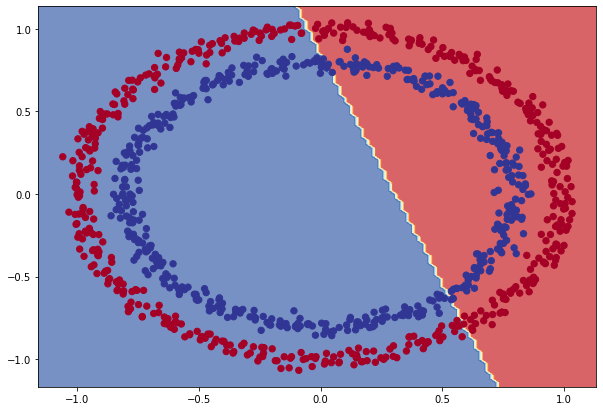

In [ ]:
plot_decision_bound(model = model_3, X = X, y = y)



**OLALA** Cela ne va pas du tout!

Il y a un sérieux probleme de décision!

La frontière de décision qui se voulait être circulaire, ne l'est pas du tout!

**Mais notre modèle pourrait-il être utilisé dans une régression?**

>> ### **Utilisons le modèle dans un probleme de régression**

In [ ]:
#Créons des datas dédiées à la régression
X_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100,5)

X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]

y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

In [ ]:
#testons le modèle 3
model_3.fit(x_reg_train, y_reg_train, epochs = 100)

NameError: ignored

**Attendez un peu...**

Que se passe-t-il?

On comparare un probleme dont de classification binaire avec un probleme de regression linéaire simple!

De plus, il y a deux entrées dans notre modèle de classification et une seule dans le probleme de regression.

> **Cela ne peut pas du tout aller pour un probleme de regression linéaire simple!**

Si nous voulons essayer 



In [ ]:
#1. Création du modèle
model_4 = tf.keras.Sequential(name='model_4')
model_4.add(tf.keras.layers.Dense(100, input_shape = [1],name='Input_Layer'))
model_4.add(tf.keras.layers.Dense(10, name='Hiden_Layer_1'))
model_4.add(tf.keras.layers.Dense(1, name='Output_Layer'))

#Compile du modèle

model_4.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_4.fit(X_reg_train, y_reg_train, epochs = 100, verbose = 0)

In [ ]:
model_4.evaluate(X_reg_test, y_reg_test)

2/2 [==============================] - 0s 9ms/step - loss: 55.8213 - mae: 55.8213


[55.82130813598633, 55.82130813598633]

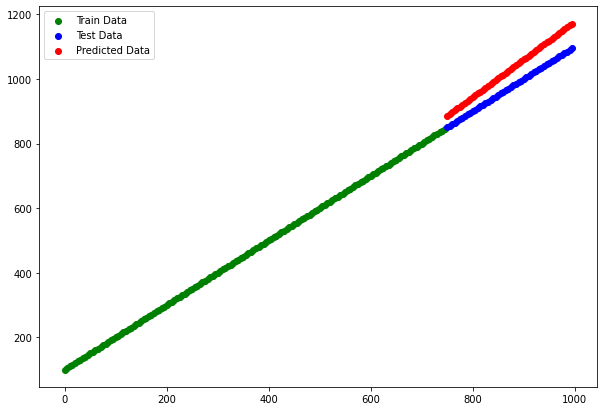

In [ ]:
y_reg_pred = model_4.predict(X_reg_test)
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c = 'g', label='Train Data')
plt.scatter(X_reg_test, y_reg_test, c = 'b', label='Test Data')
plt.scatter(X_reg_test, y_reg_pred, c = 'r', label='Predicted Data')
plt.legend(loc='best')


**MAIS ALORS**, pourquoi en modifiant le modèle nous arrivons à faire une *regression linaire*, mais que sans modifier nous ne pouvons pas appliquer le model_3 directement sur les données linéaire ?

**ET BIEN LA REPONSE EST SIMPLE**

Le probleme de classification que nous essayons de résoudre n'est pas linéaire!!!

Nous voila confronté à un probleme de **NON LINEARITE**

Découvrons ce que cela signifie!


## **Le concept de non-Linearité**

In [ ]:
#Entrainons le modèle plus longtemps afin de l'améliorer
# Etape 1 : Création du modèle
model_5 = tf.keras.Sequential(name='model_5')
model_5.add(tf.keras.layers.Dense(1,input_shape =[2], activation = 'linear', name = 'Input_Layer'))


#Etape 2 : Compiler le modèle
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])


#3. Entrainement du modèle
history_5 = model_5.fit(X,y, epochs = 100, verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_5.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 4.4126 - accuracy: 0.4710


[4.4126296043396, 0.47099998593330383]

Une fois évalué, le modèle n'a pas une perfomance folle!

Regardons la frontière de décision...et c'est pas fou fou!

Nous faisons de la classification binaire


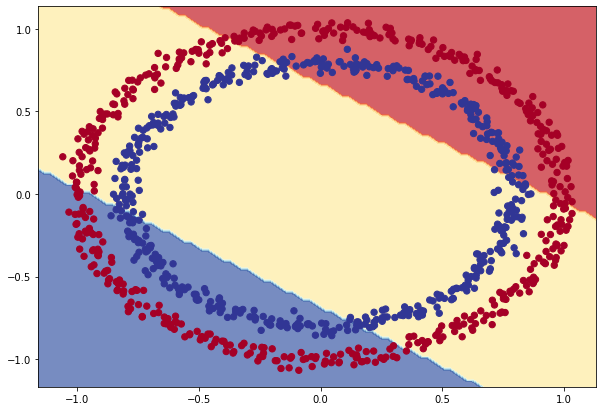

In [ ]:
plot_decision_bound(model = model_5, X = X, y = y)

En utilisant l'outil sur [Tensorflow Playground](http://playground.tensorflow.org/), nous remarquons que nous obtenons le même résultat !

Ce qui est rassurant (et normal, soit dit en passant).

Voici ce que donne l'outil, facile à parametrer.

Pour avoir une frontière plus stable et plus fine, il faudrait plus de 300 epochs! Mais la clasification sera toujours linéaire!

Je vous laisse le loisir d'essayer!

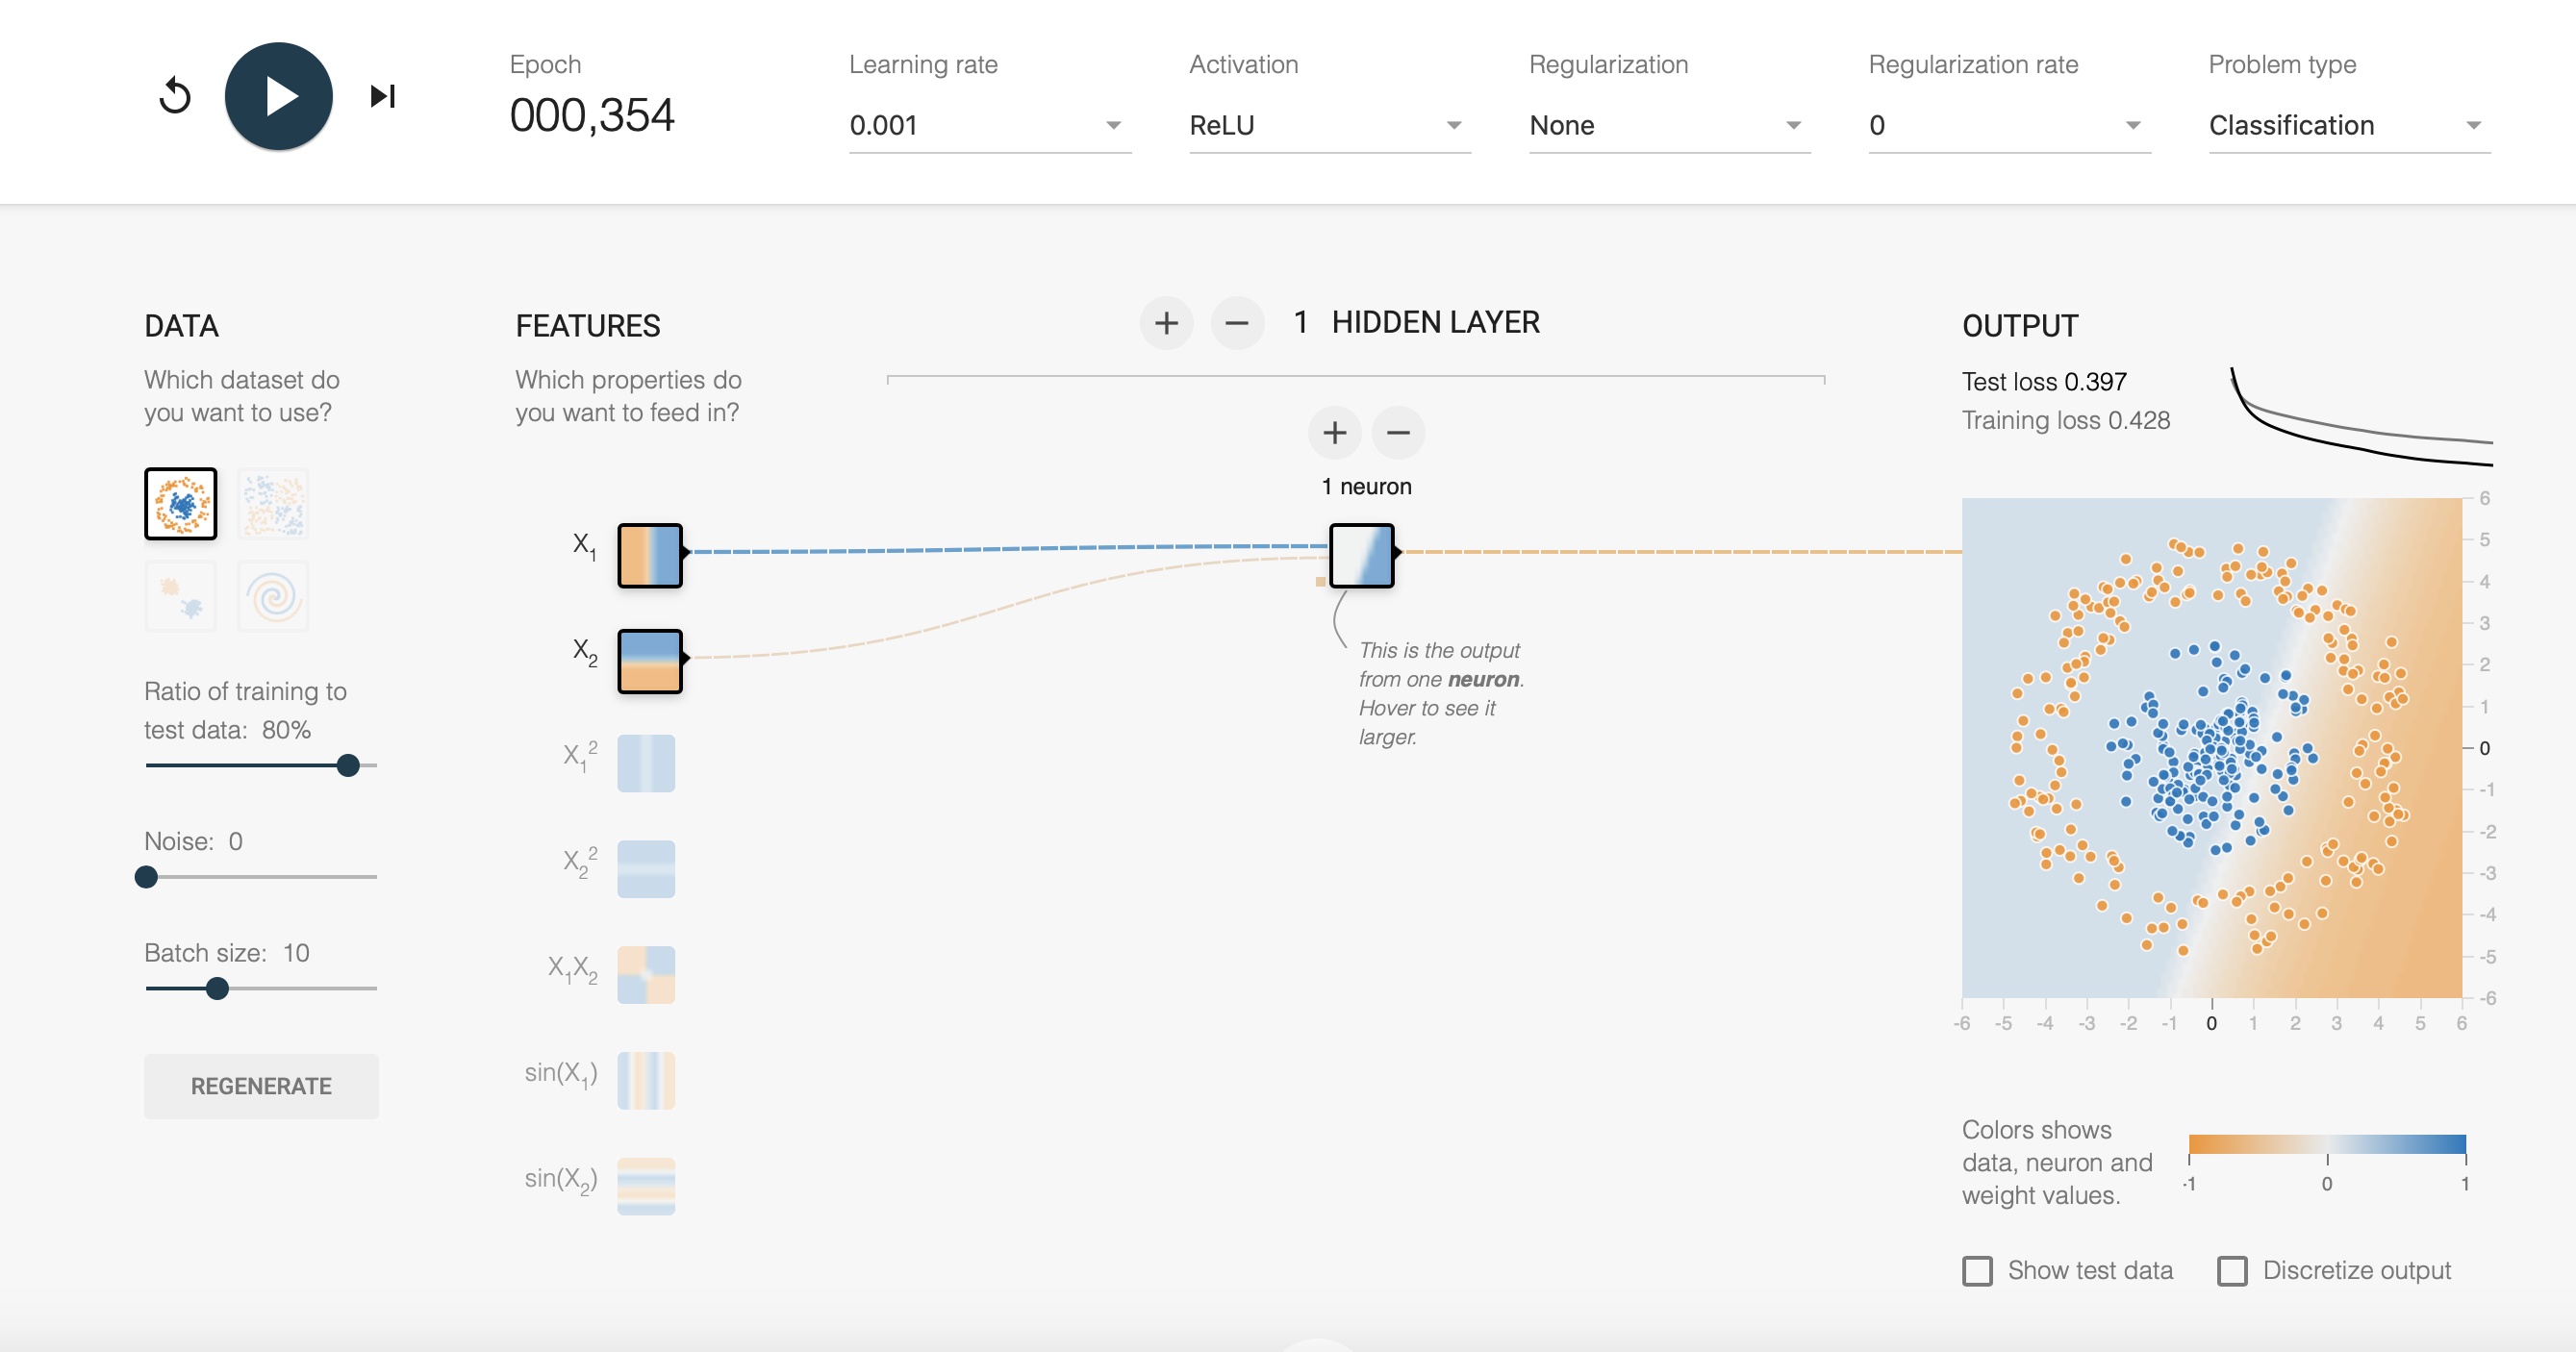

Nous avons vraiment besoin d'un modèle **NON-LINEAIRE**

**Changeons la fonction d'activation** et mettons une fonction d'activation ***Relu***

In [ ]:
#Entrainons le modèle plus longtemps afin de l'améliorer
# Etape 1 : Création du modèle
model_6 = tf.keras.Sequential(name='model_6')
model_6.add(tf.keras.layers.Dense(1,input_shape =[2], activation = 'relu', name = 'Input_Layer'))


#Etape 2 : Compiler le modèle
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])


#3. Entrainement du modèle
history_6 = model_5.fit(X,y, epochs = 100, verbose = 0)

In [ ]:
model_5.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.8086 - accuracy: 0.4940


[0.8085620403289795, 0.49399998784065247]

**HO!** C'est toujours le même probleme. La solution est toujours linéaire!!!

Nous faisons de la classification binaire


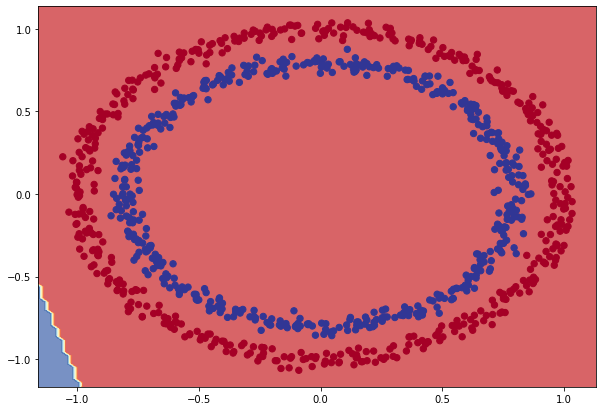

In [ ]:
plot_decision_bound(model = model_6, X = X, y = y)

**Améliorons notre modèle**

Pour cela, nous avons pas le choix, nous devons augmenter le nombre de neurones

Pour cela, augmentons le nombre de :
- Neurones
- De couches

In [ ]:
#Entrainons le modèle plus longtemps afin de l'améliorer
# Etape 1 : Création du modèle
model_7 = tf.keras.Sequential(name='model_7')
model_7.add(tf.keras.layers.Dense(4,input_shape =[2], activation = 'relu', name = 'Input_Layer'))
model_7.add(tf.keras.layers.Dense(4, activation = 'relu', name = 'Hidden_Layer'))
model_7.add(tf.keras.layers.Dense(1, activation = 'relu', name = 'Output_Layer'))


#Etape 2 : Compiler le modèle
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])


#3. Entrainement du modèle
history_7 = model_7.fit(X,y, epochs = 100, verbose = 0)

In [ ]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7900


[0.4718330502510071, 0.7900000214576721]

Nous faisons de la classification binaire


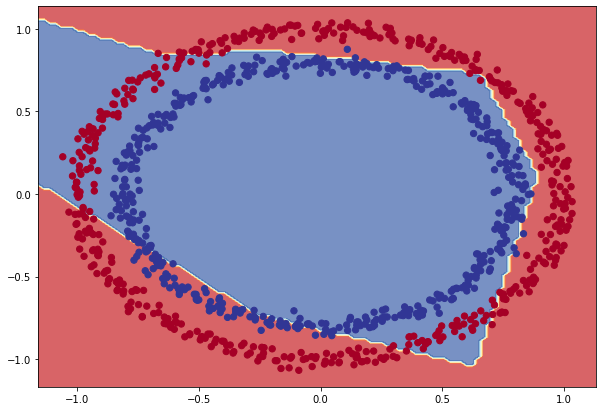

In [ ]:
plot_decision_bound(model = model_7, X = X, y = y)

**MAIS IL VIENT DE SE PASSER UN TRUC**

Ne trouvez-vous pas que c'est comme si il y avait une superposition de droites qui venait englober les points?
Et où ces droites se plaçait de sorte à former un *cercle* ?

Toujours sur le [Tensorflo Playground](http://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.03668&showTestData=false&discretize=false&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false), nous avons testé le type de probleme, et nous trouvons le même type de résultat!!!

**YESS**

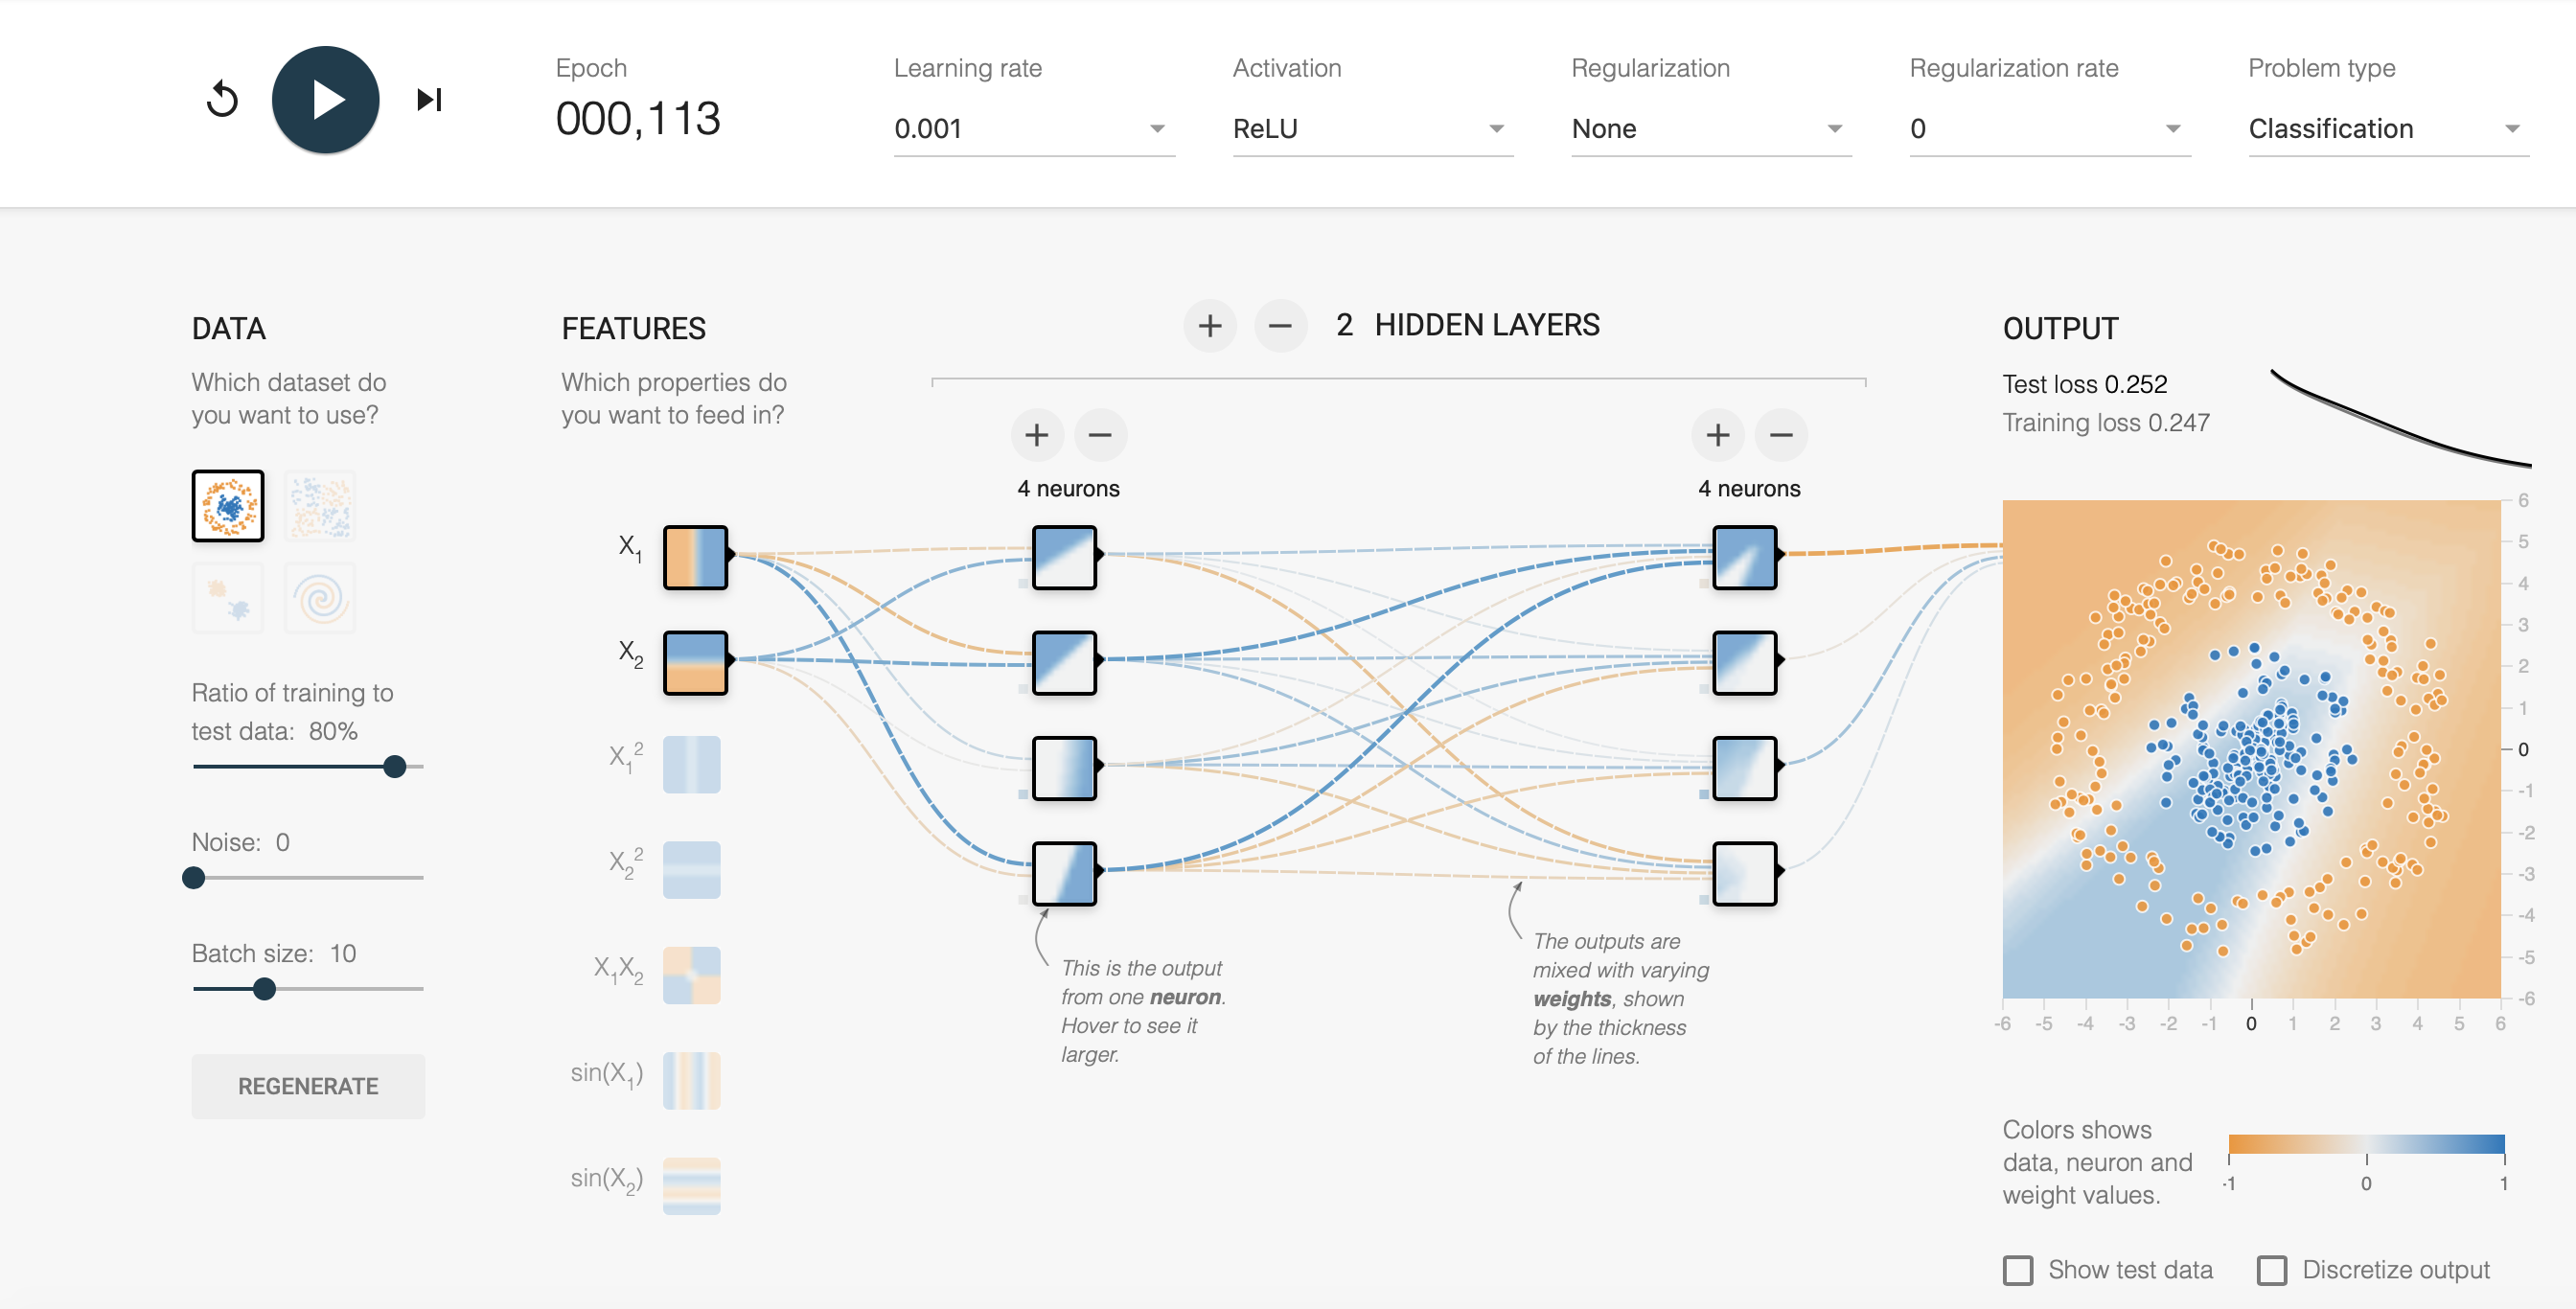

La fonction d'activation **RELU** vient établi une sortie *linéaire*.

En l'occurence, chaque neurone va se spécialiser dans une découpe linéaire, et la fonction d'activation du neurone de sortie *(Output_Layer)* va venir combiner tout cela.

La fonction d'activation de notre neurone de sortie étant *RELU*, la combinaison reste linéaire, ce qui donne cet aspect *coupé au couteau*

On se doute donc que la fonction d'activation n'est pas celle attendue!

En effet, dans les problemes de classification, les fonction d'activation souvent utilisées sont la fonction ***Sigmoid*** ou la fonction ***Softmax***

In [ ]:
#Entrainons le modèle plus longtemps afin de l'améliorer
# Etape 1 : Création du modèle
model_8 = tf.keras.Sequential(name='model_8')
model_8.add(tf.keras.layers.Dense(4,input_shape =[2], activation = 'relu', name = 'Input_Layer'))
model_8.add(tf.keras.layers.Dense(4, activation = 'relu', name = 'Hidden_Layer'))
model_8.add(tf.keras.layers.Dense(1, activation = 'relu', name = 'Output_Layer'))


#Etape 2 : Compiler le modèle
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])


#3. Entrainement du modèle
history_8 = model_8.fit(X,y, epochs = 100, verbose = 0)

In [ ]:
model_8.evaluate(X,y)

32/32 [==============================] - 0s 6ms/step - loss: 0.3875 - accuracy: 0.9420


[0.3875289261341095, 0.9419999718666077]

**MAIS...**
on peut remarquer que l'évaluation du modèle *(en l'occurence, l'accuracy)* est de près de **0.95** ce qui est une nette amélioration!

Nous faisons de la classification binaire


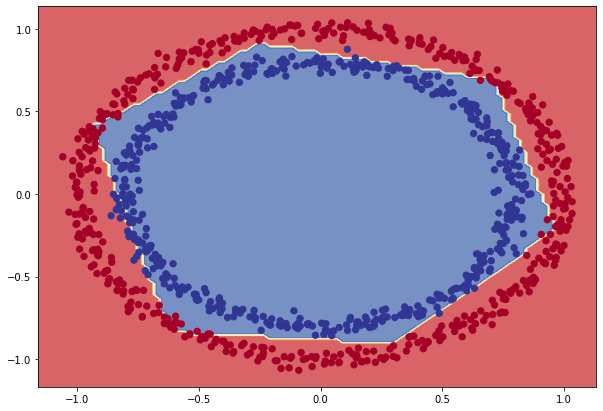

In [ ]:
plot_decision_bound(model = model_8, X = X, y = y)

En changeant la fonction d'activation du neurone de sortie de **RELU** vers **SIGMOID**, nous avons quelque chose qui se rapproche d'un cercle!

❓ Mais qu'est-ce qui ne va pas avec notre modèle? Il n'est pas encore parfait!

🔑 Nous pouvons remarquer que la combinaison de couches **linéaires** et **non-linéaires** améliorent le modèle!

C'est un point fondamental des réseaux de neurones dans la classification!

### Essons de comprendre ce que fait une sigmoid

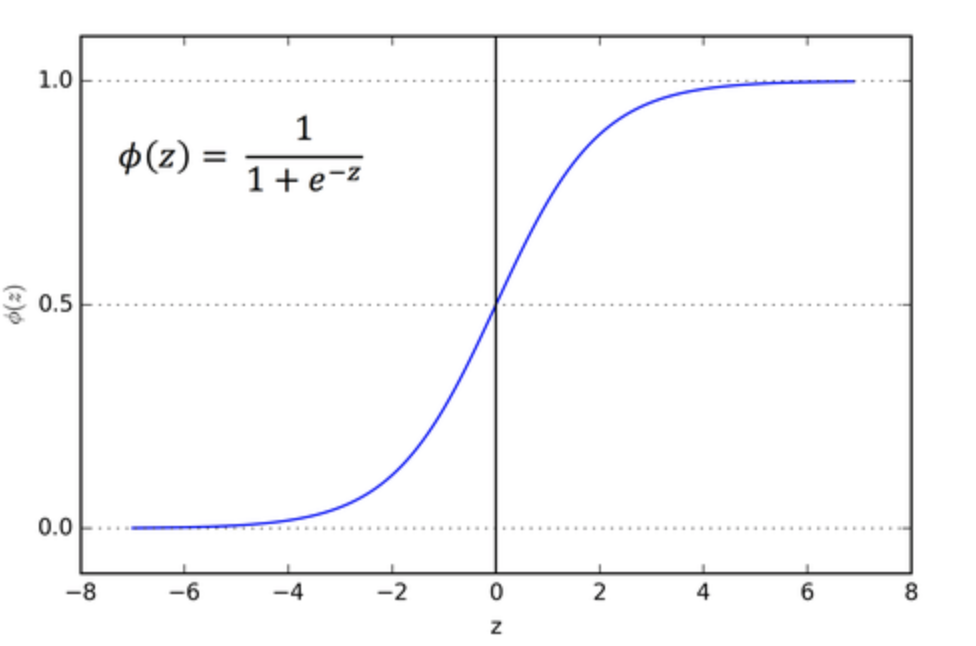

La **Sigmoid** est une sorte de *S* passant de 0 à 1.

Son équation semble complexe. Essyons de comprendre ce qu'elle fait réellement quand on lui passe une donnée!

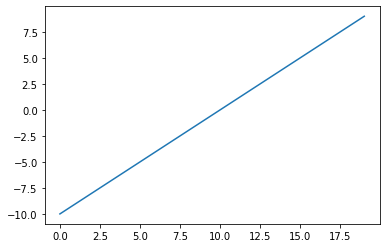

In [ ]:
# Créons une droite!
Line = tf.cast(tf.range(-10,10), tf.float32)
plt.plot(Line)

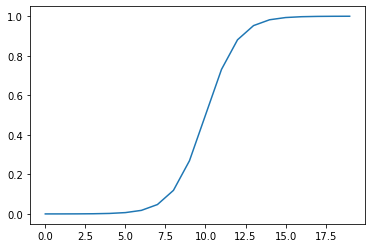

In [ ]:
#Créons la fonction sigmoid
def Sigmoid(x):
  sigmoid = 1/(1+tf.exp(-x))
  return sigmoid

Test = Sigmoid(Line)

plt.plot(Test)

Et que fait la fonction **RELU** ?

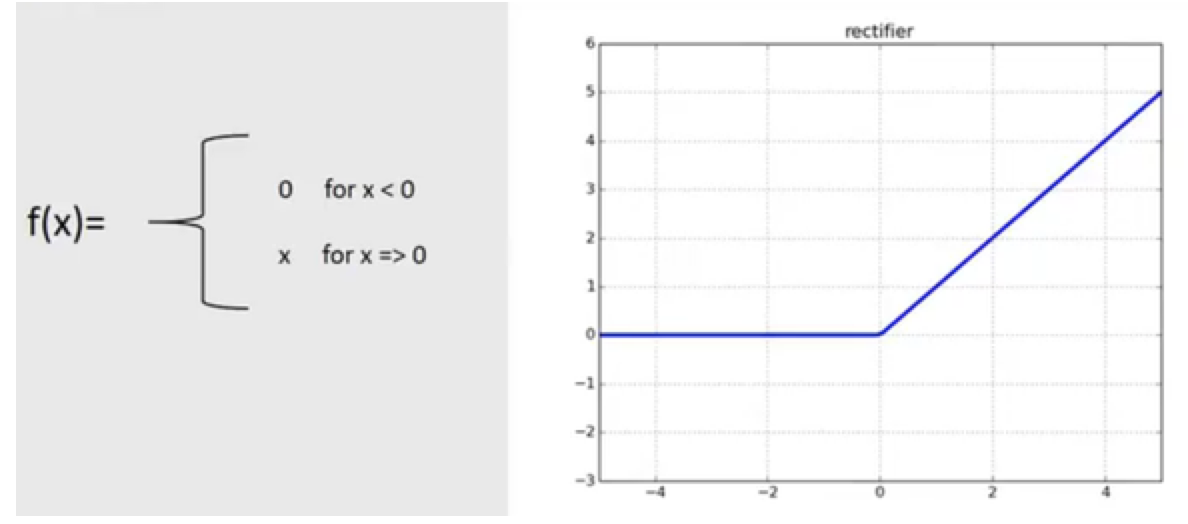

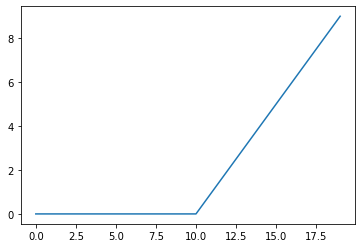

In [ ]:
def Relu(x):
  relu = tf.maximum(0,x)

  return relu

Test = Relu(Line)
plt.plot(Test)

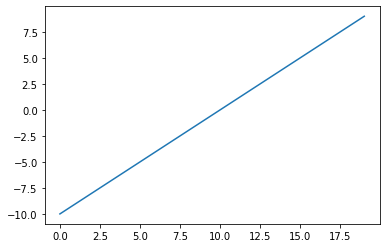

In [ ]:
# Essoyons la fonction Linear

plt.plot(tf.keras.activations.linear(Line))

**REMARQUE**

Dans notre recherche de la **NON-LINEARITE** nous remarquons plusieures choses sur les *fonctions d'activation* :
- **LINEAR** ne fait rien. Le tenseur de sortie est identique au tenseur de rentrée.
- **ReLu** vient *Rectifier* la *Linearité* de l'entrée du tenseur de sortie
 - Ce qui rentre *négatof* dans **ReLu** est égal à *0*
 - Le tenseur de sortie est donc **Non Linéaire**
- **Sigmoid** vient transformer le tenseur d'entrée en un tenseur de sortie évoluant de **0** à **1**
 - Les classification utilisent beaucoup cette notion de Sigmoid
 - **0** représente 0 % de chance d'appartenir à une classe
 - **1** représente 100 % de chance d'appartenir à une classe
  - **0.56** représente donc 56 % d'appartenir à une classe
  - ... vous avez compris
  - Nous pouvons donc classer facilement avec la fonction Sigmoid!


🔑  On peut donc dire que la fonction :
- **Linear** est une fonction de *linéarité*
- **ReLu** est une fonction de *non-linéarité*
- **Sigmoid** est une fonction de *non-linearité*

Mantenant que nous savons ce que sont les fonction non-linéaire

### Améliorons notre modèle de Classification

In [5]:
#Créons la dataset Train et Test

X_Train, X_Test=X[:800], X[800:]
y_Train, y_Test=y[:800], y[800:]

X_Train.shape, y_Train.shape, X_Test.shape, y_Test.shape

((800, 2), (800,), (200, 2), (200,))

In [6]:
# Entrainons notre modèle sur les données d'entrainement :

# Etape 1 : Création du modèle
model_9 = tf.keras.Sequential(name='model_9')
model_9.add(tf.keras.layers.Dense(4,input_shape =[2], activation = 'relu', name = 'Input_Layer'))
model_9.add(tf.keras.layers.Dense(4, activation = 'relu', name = 'Hidden_Layer'))
model_9.add(tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'Output_Layer'))


#Etape 2 : Compiler le modèle
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # modifion le learning rate de 0.001 à 0.01
                metrics=["accuracy"])


#3. Entrainement du modèle
history_9 = model_9.fit(X_Train,y_Train, epochs = 200, verbose = 0) # Augmentons un peu l'époch

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_9.evaluate(X_Train, y_Train)

25/25 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9950


[0.017502982169389725, 0.9950000047683716]

In [ ]:
model_9.evaluate(X_Test, y_Test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9800


[0.03789672255516052, 0.9800000190734863]

**WAAAWWW** nous n'avons jamais eu une *accuray* aussi proche de *1*

313/313 [==============================] - 0s 1ms/step
Nous faisons de la classification binaire
313/313 [==============================] - 0s 1ms/step
Nous faisons de la classification binaire


Text(0.5, 1.0, 'Test')

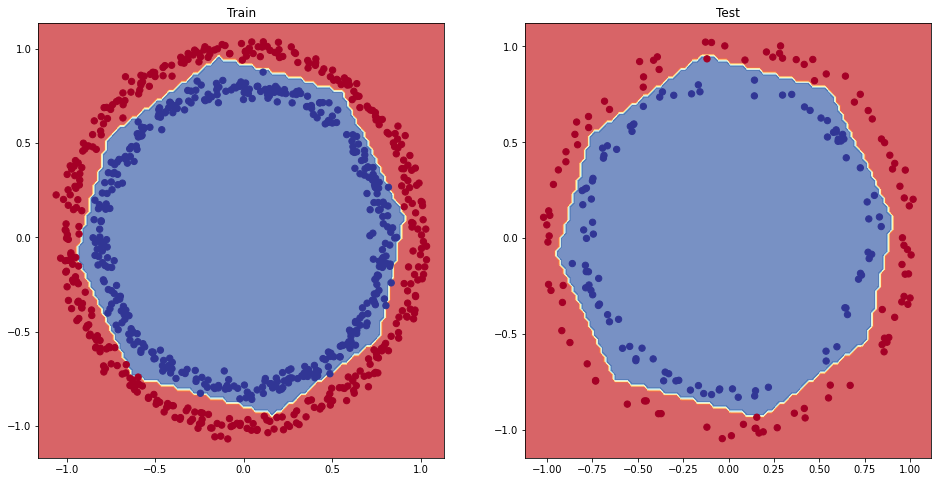

In [9]:
#Affichons notre graph des données d'entrainement et de test

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_bound(model = model_9, X = X_Train, y = y_Train)
plt.subplot(1,2,2)
plot_decision_bound(model = model_9, X = X_Test, y = y_Test)
plt.title('Test')

**WAW** on est pas si mal finalement!

On sent que l'on pourrait encore un peu améliorer les choses, mais on tient un modèle performant!



## La courbe LOSS

Souvenez-vous pour voir votre modèle, il faut :
- Visualiser
- Visualiser
- Visualiser

Dès lors, avant une prédiction, pour vérifier que votre modèle tend vers quelque chose de tangible, il faut visualiser `la courbe loss`

Elle représente la courbe les valeurs de `loss` et de `metrics` durant les différentes époch de l'entrainement du modèle.

On retrouve donc ces valeurs dans la variable `history` égal à l'entrainement du modèle :

**hystory = model.fit(x_train, y_train)**

Regardons ce que contient history

In [11]:
#history_9.history 

Text(0.5, 1.0, 'Model 9 - Loss Curve')

<Figure size 720x504 with 0 Axes>

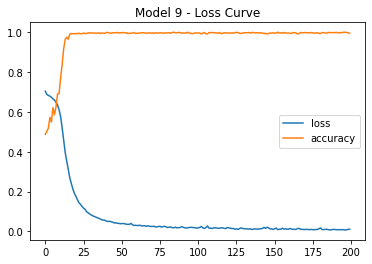

In [13]:
#Mettons ces données dans une dataset!
plt.figure(figsize=(10,7))
pd.DataFrame(history_9.history).plot()
plt.title('Model 9 - Loss Curve')

**Deux courbes** se montrent :
- **loss curve** 
- **Accuracy curve**

Pour beaucoup de problemes, la courbe loss descend, signe que le modèle s'améliore.

Mais si on sait que si la courbe `loss` descend en améliorant le modèle, comment améliorer le learning rate ?

Essayons donc de trouver le learning rate optimal!


## Trouvons le meilleur learning rate

In [29]:

# Etape 1 : Création du modèle
model_10 = tf.keras.Sequential(name='model_10')
model_10.add(tf.keras.layers.Dense(4,input_shape =[2], activation = 'relu', name = 'Input_Layer'))
model_10.add(tf.keras.layers.Dense(4, activation = 'relu', name = 'Hidden_Layer'))
model_10.add(tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'Output_Layer'))


#Etape 2 : Compiler le modèle
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # modifion le learning rate de 0.001 à 0.01
                metrics=["accuracy"])

#Etape 3 : Cration du learning_rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch :1e-4 * 10**(epoch/20))

#3. Entrainement du modèle
history_10 = model_10.fit(X_Train,y_Train, 
                          epochs = 100, 
                          callbacks =[lr_scheduler],
                          verbose = 1) 

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7274 - accuracy: 0.5175 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7259 - accuracy: 0.5163 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7243 - accuracy: 0.5113 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7227 - accuracy: 0.5138 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7210 - accuracy: 0.5088 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7192 - accuracy: 0.5063 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7174 - accuracy: 0.5025 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7155 - accuracy: 0.5050 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

Text(0.5, 1.0, 'Model 9 - Loss Curve')

<Figure size 720x504 with 0 Axes>

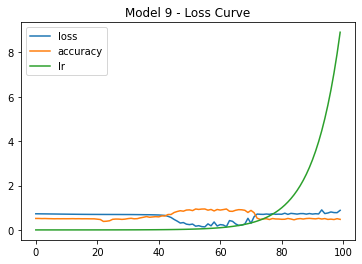

In [30]:
plt.figure(figsize=(10,7))
pd.DataFrame(history_10.history).plot()
plt.title('Model 9 - Loss Curve')

Bon, ça change carrement de la courbe de tout à l'heure!

On a une courbe `Learning_Rate` supplémentaire.

Que pouvons-nous remarquer ? :
- **Learning Rate** démarre très bas *( à une valeur très tres proche de 0)* pour remonter très fort à partir de 60 epochs
- **Loss** commence à descendre à partir de 40 epoch, pour demonter à 80 epochs
- **Accuracy** Monte à partir de 40 epochs, et descend à partir de 80 epochs

Text(0.5, 1.0, 'Leaning Rate vs Loss')

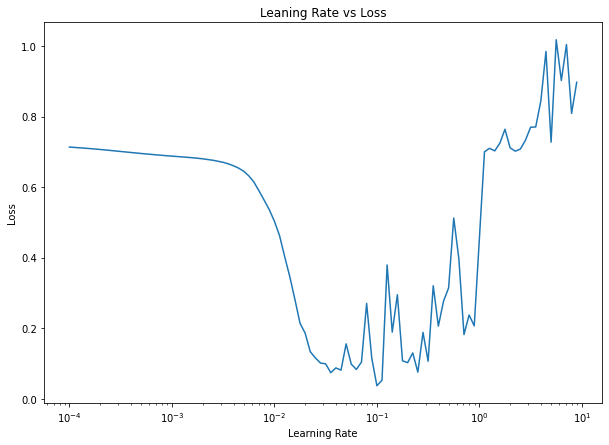

In [28]:
#plot loss vs Learning rate
lrs = 1e-4 * 10**(tf.range(0,100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_10.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Leaning Rate vs Loss')

Nous pouvons maintenant choisir le **learning rate** optimum qui minimise la fonction loss.

D'ailleurs, ce minimum se trouve entre 10^-2 et 10^-1

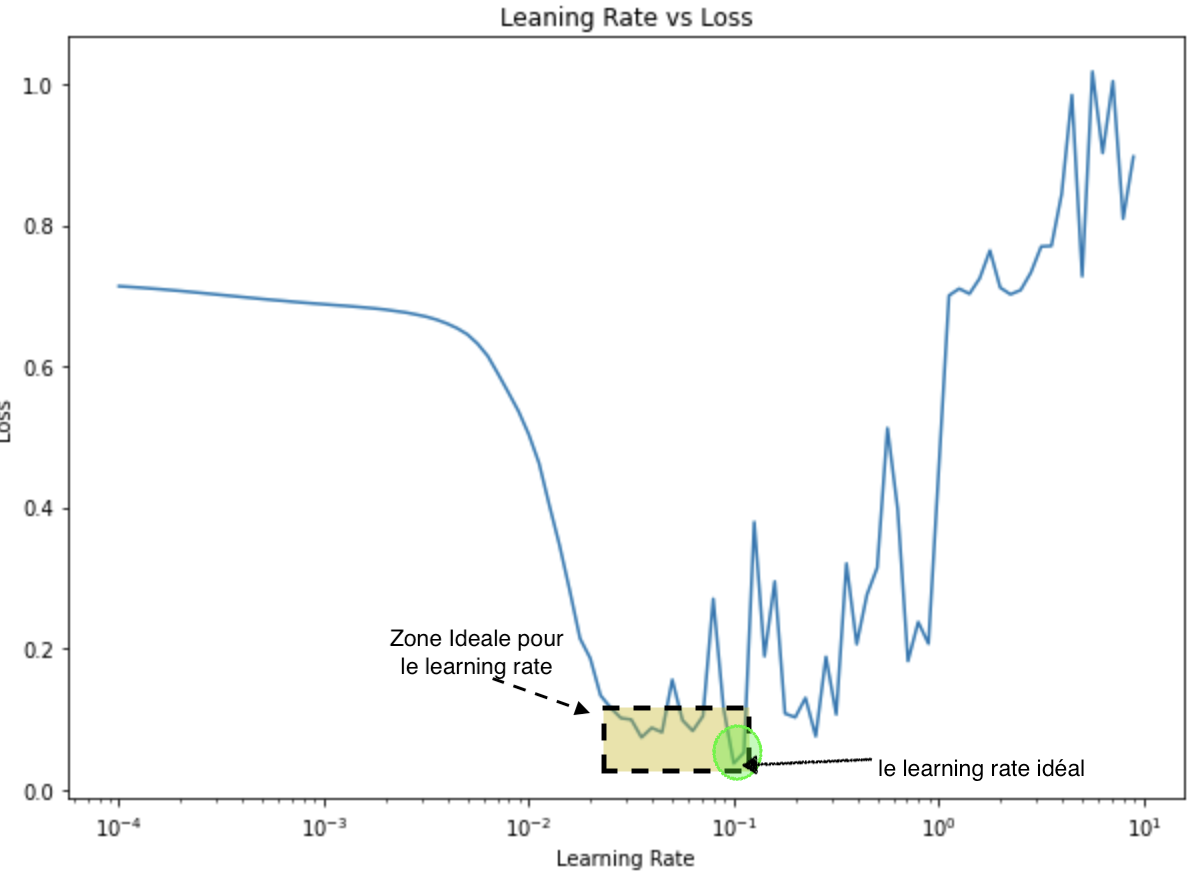

Essyons de voir ce qu'il se pase avec learning rate optimal.

Ici nous pensons qu'il est à 0.02

### Lr = 0.02

In [48]:

# Etape 1 : Création du modèle
model_11 = tf.keras.Sequential(name='model_11')
model_11.add(tf.keras.layers.Dense(4,input_shape =[2], activation = 'relu', name = 'Input_Layer'))
model_11.add(tf.keras.layers.Dense(4, activation = 'relu', name = 'Hidden_Layer'))
model_11.add(tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'Output_Layer'))


#Etape 2 : Compiler le modèle
model_11.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # modifion le learning rate de 0.001 à 0.01
                metrics=["accuracy"])

#Etape 3 : Cration du learning_rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch :1e-4 * 10**(epoch/20))

#3. Entrainement du modèle
history_11 = model_11.fit(X_Train,y_Train, 
                          epochs = 25, 
                          #callbacks =[lr_scheduler], # Attention, nous retirons le callback car le lr est optimisé!
                          verbose = 1) 

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 3ms/step - loss: 0.6910 - accuracy: 0.5350
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6841 - accuracy: 0.5850
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6685 - accuracy: 0.6300
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6408 - accuracy: 0.6388
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5991 - accuracy: 0.6988
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5854 - accuracy: 0.6700
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: 0.4997 - accuracy: 0.7937
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4650 - accuracy: 0.7937
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3928 - accuracy: 0.8637
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3246 - accuracy: 0.9212
Epoch 11/25
25/25 [===========

Nous pouvons voir un accuracy amélioré à 0.9775 pour le Train



In [49]:
model_11.evaluate(X_Test, y_Test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0752 - accuracy: 0.9800


[0.07517462223768234, 0.9800000190734863]

Text(0.5, 1.0, 'Model 9 - Loss Curve')

<Figure size 720x504 with 0 Axes>

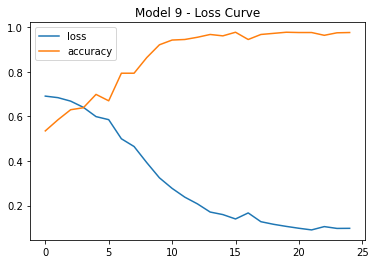

In [50]:
plt.figure(figsize=(10,7))
pd.DataFrame(history_11.history).plot()
plt.title('Model 9 - Loss Curve')

313/313 [==============================] - 0s 1ms/step
Nous faisons de la classification binaire
313/313 [==============================] - 0s 1ms/step
Nous faisons de la classification binaire


Text(0.5, 1.0, 'Test')

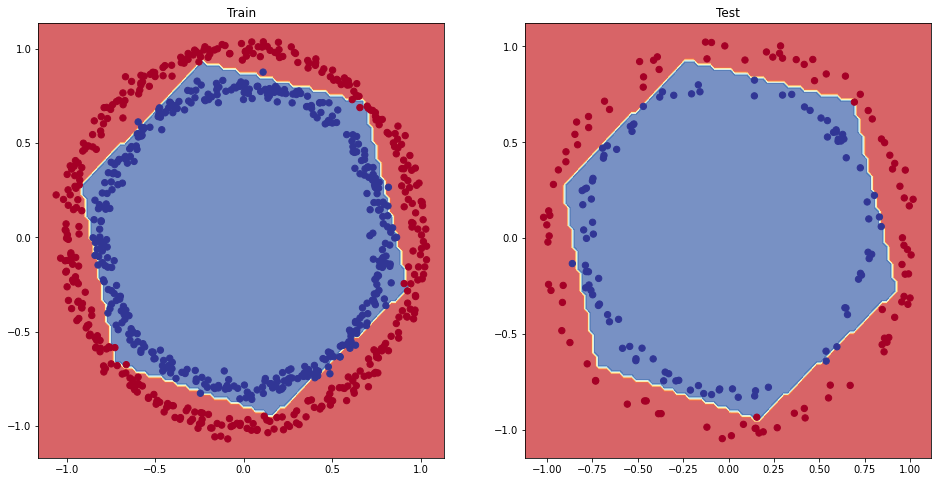

In [51]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_bound(model = model_11, X = X_Train, y = y_Train)
plt.subplot(1,2,2)
plot_decision_bound(model = model_11, X = X_Test, y = y_Test)
plt.title('Test')

Hé bien, la classification est pas mal du tout!!!

Cependant c'est encore un peu "carré".

Si la fonction Relu garde un petit côté linéaire pour les données positive, augmentons les neurones de 4 à 10 pour tendre vers un côté plus liss de la frontière de Clustering!

In [63]:
# Etape 1 : Création du modèle
model_12 = tf.keras.Sequential(name='model_12')
model_12.add(tf.keras.layers.Dense(10,input_shape =[2], activation = 'relu', name = 'Input_Layer'))
model_12.add(tf.keras.layers.Dense(10, activation = 'relu', name = 'Hidden_Layer'))
model_12.add(tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'Output_Layer'))


#Etape 2 : Compiler le modèle
model_12.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.04), # modifion le learning rate de 0.001 à 0.01
                metrics=["accuracy"])

#Etape 3 : Cration du learning_rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch :1e-4 * 10**(epoch/20))

#3. Entrainement du modèle
history_12 = model_12.fit(X_Train,y_Train, 
                          epochs = 25, 
                          #callbacks =[lr_scheduler], # Attention, nous retirons le callback car le lr est optimisé!
                          verbose = 0) 

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Text(0.5, 1.0, 'Leaning Rate vs Loss')

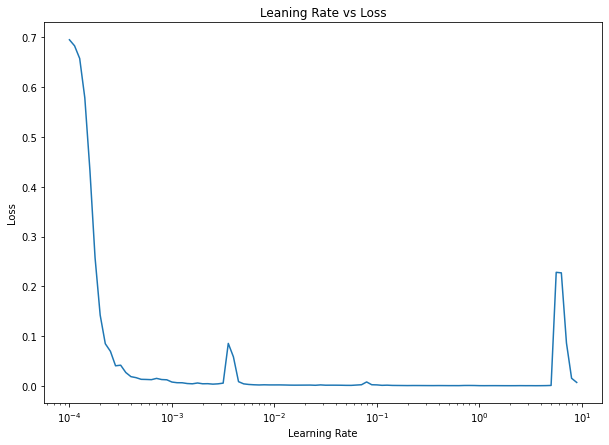

In [61]:
#plot loss vs Learning rate
lrs = 1e-4 * 10**(tf.range(0,100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_12.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Leaning Rate vs Loss')

Garder le même learning rate de 0.02 ne change pas les résultats, mais prendr eun learning rate de 0.04 serait pas mal.... mais c'estr pinailler!

313/313 [==============================] - 0s 1ms/step
Nous faisons de la classification binaire
313/313 [==============================] - 0s 1ms/step
Nous faisons de la classification binaire


Text(0.5, 1.0, 'Test')

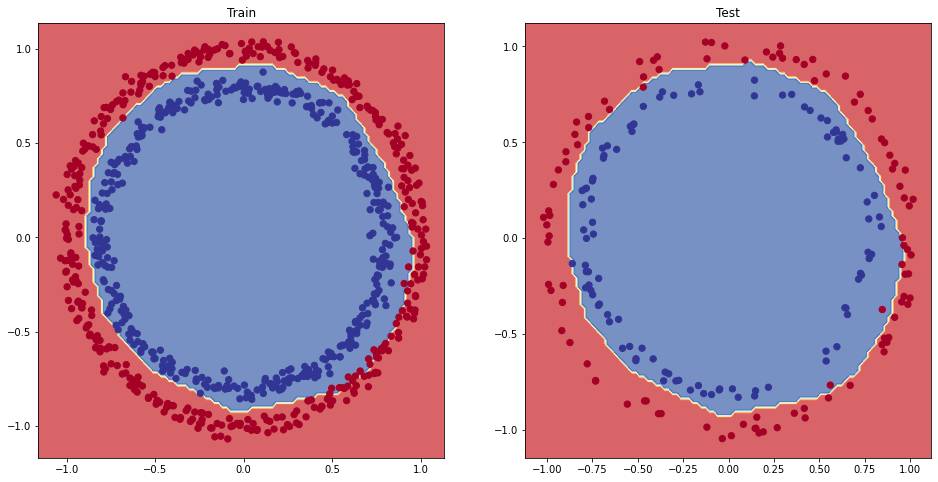

In [64]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_bound(model = model_12, X = X_Train, y = y_Train)
plt.subplot(1,2,2)
plot_decision_bound(model = model_12, X = X_Test, y = y_Test)
plt.title('Test')

**Oh YEAH** La classification est vraiment pas mal!